# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Откроем файл и посмотрим на первые 10 строк для общего представления.

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
flat = pd.read_csv('/datasets/real_estate_data.csv', '\t')
flat.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
flat.shape

(23699, 22)

In [3]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
flat.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
flat['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [6]:
flat['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

ПЕРЕРИСОВАЛ ГРАФИК, НО НЕ В ГИСТОГРАММЕ.

Text(0, 0.5, 'высота потолка')

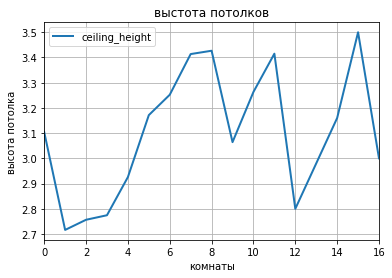

In [7]:
flat.pivot_table(index = 'rooms', values = 'ceiling_height').plot( grid = True,
                        linewidth = 2, legend = True, title = 'выстота потолков')
plt.xlabel('комнаты')
plt.ylabel('высота потолка')

Text(0, 0.5, 'количество')

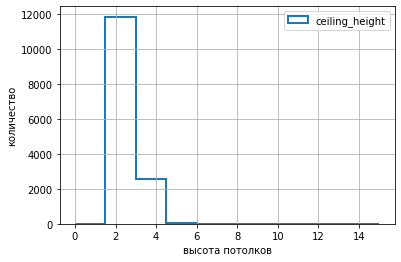

In [8]:
flat.plot(y = 'ceiling_height', kind = 'hist', grid = True, range= (0, 15), histtype = 'step', linewidth = 2)
plt.xlabel('высота потолков')
plt.ylabel('количество')

Text(0, 0.5, 'количество')

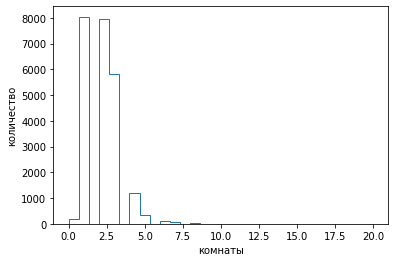

In [9]:
flat['rooms'].plot(bins= 30, range = (0, 20), kind = 'hist', histtype = 'step')
plt.xlabel('комнаты')
plt.ylabel('количество')

In [10]:
flat['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

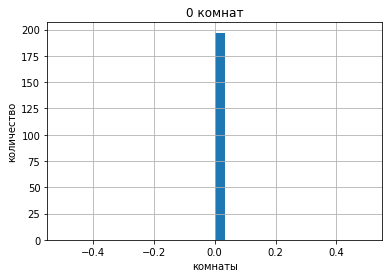

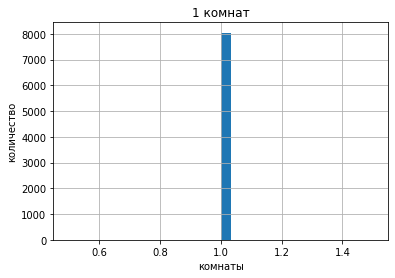

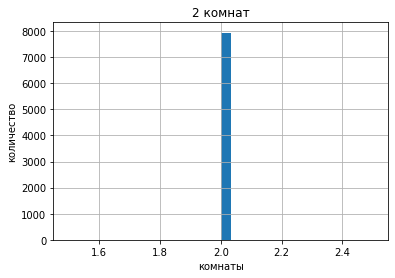

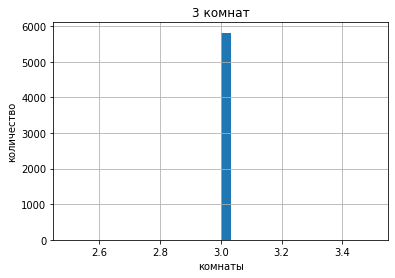

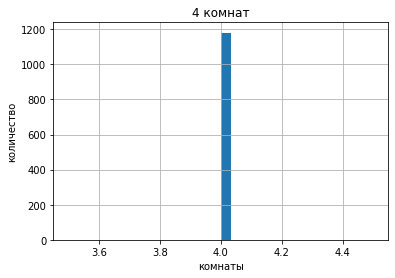

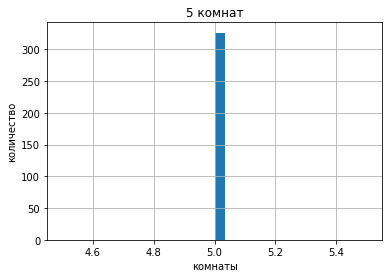

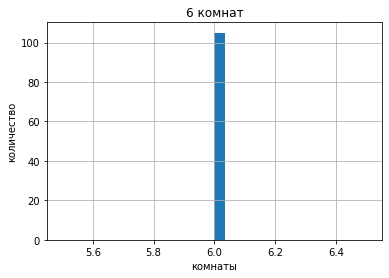

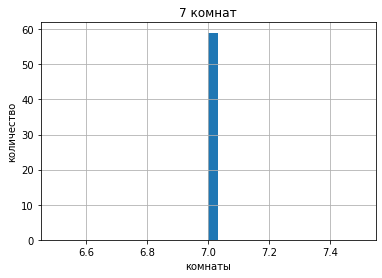

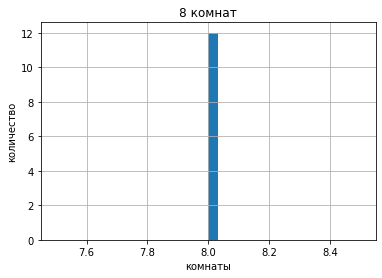

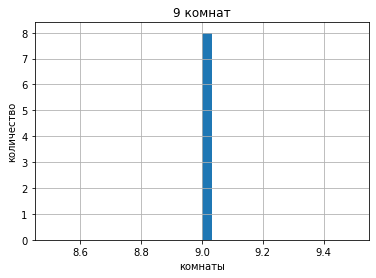

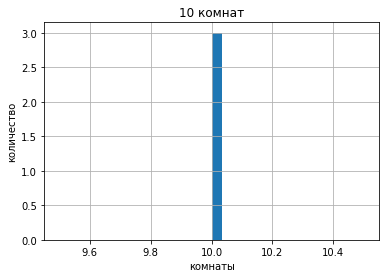

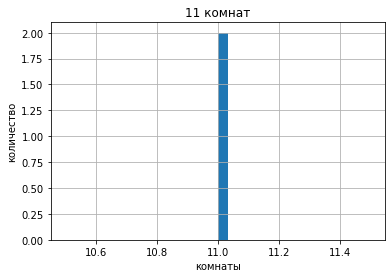

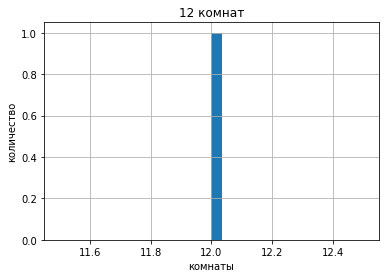

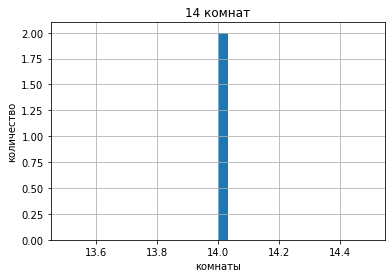

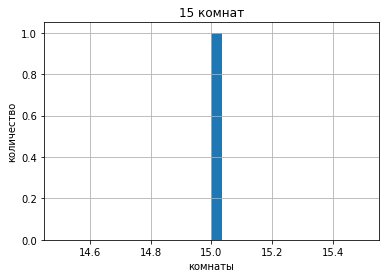

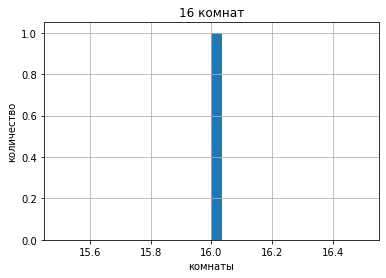

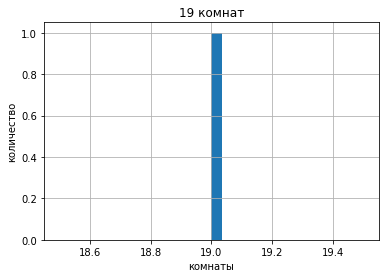

In [11]:
for rooms, height in flat.groupby('rooms'):
    height.hist('rooms',bins = 30)
    plt.xlabel('комнаты')
    plt.ylabel('количество')
    plt.title(str(rooms) + ' комнат')

### Вывод

Из общей информации по датафрейму можно понять, что в датафрейме очень много пропусков, строки с которыми удалить нельзя. Тип данных столбцов воспринимается программой корректно, за исключением столбцов с наличием апартаментов, все поправим дальше. Также обнаружили странные квартиры с высотой потосков 1 метр и 100 метров, площадью кухни 1 и 112 метров, данные явно некорректные, сделаем потом нужный срез.

### Шаг 2. Предобработка данных

Обработаем пропуски в таблице по тем столбцам, по которым это возможно, а потом преобразуем типы данных. Вставим на место пропусков количества балконов нули, так как, скорее всего, если их не указали, то их нет. То же самое сделаем с прудами, парками в радиусе 3 км.

In [12]:
flat.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [13]:
flat['balcony'] = flat['balcony'].fillna(0)
flat['parks_around3000'] = flat['parks_around3000'].fillna(0)
flat['ponds_around3000'] = flat['ponds_around3000'].fillna(0)
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Попробуем посмотреть на межквартильный размах, чтобы узнать среднее и медиану по высоте потолков.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


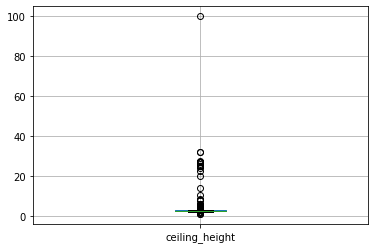

In [14]:
flat.boxplot('ceiling_height')
print(flat['ceiling_height'].describe())

Видим, что есть выбросы в виде слишком маленькх значений и слишком больших значений... отбросим "усы" методом query. В просмотре общих данный мы видели, что квартир с потолками 3 метра чуть больше 1000 штук, а это 1/20 всего списка, а минимумом возьмем число чуть меньше первого квартиля, так как если посмотреть на гистограмму, то можно увидеть, что при 2.49 есть скачок, которы важно задействовать в исследовании. Не искажая общности, заполним пропуски в этом столбце рандомными числами между 2.49 и 3.5. Прибавим к минимальному числу 2.49 рандомное число из радиуса (0, 1) включительно, тогда максимальным числом будет 3,49, что очень близко к 3.5

In [15]:
flat = flat.query('2.49 <= ceiling_height <= 3.5 ')
flat.count()

total_images            14128
last_price              14128
total_area              14128
first_day_exposition    14128
rooms                   14128
ceiling_height          14128
floors_total            14119
living_area             13354
floor                   14128
is_apartment             1795
studio                  14128
open_plan               14128
kitchen_area            13219
balcony                 14128
locality_name           14116
airports_nearest        11220
cityCenters_nearest     11237
parks_around3000        14128
parks_nearest            5062
ponds_around3000        14128
ponds_nearest            5507
days_exposition         11752
dtype: int64

In [16]:
flat['ceiling_height'] = flat['ceiling_height'].fillna(2.49 + random.random())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,NaN,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20,3550000.0,42.8,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,NaN,False,False,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0


В столбце количества этажей всего 86 пропусков, что очень мало. Не будем их заполнять, к тому же мы никак не сможем заполнить пропуски.

In [18]:
flat['rooms'].value_counts()

2     4745
1     4555
3     3690
4      754
5      194
0       79
6       61
7       31
9        7
10       3
8        3
11       2
15       1
14       1
12       1
16       1
Name: rooms, dtype: int64

Посмотрим на ящик с усами по комнатам.

count    14128.000000
mean         2.114949
std          1.074203
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

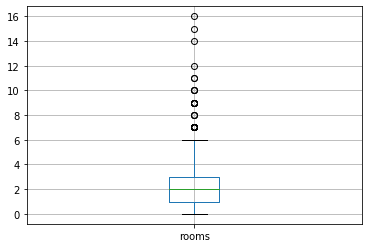

In [19]:
flat.boxplot(column = 'rooms')
flat['rooms'].describe()

16 комнат - это, конечно, все очень хорошо, но как то странно... отбросим усы, которые являтся крайностями: 0 и все, что больше 7 комнат, так как квартир с 8 комнатами нет, это уже дом, а если и есть, то в нашем фрейме их всего лишь 3. Заполним пропуски жилой площади средней арифметической площадью квартир с соответствующим количеством комнат

In [20]:
flat = flat.query('1 <= rooms <= 7')

In [21]:
flat['living_area'] = flat['living_area'].fillna(flat.groupby('rooms')['living_area'].transform('mean'))
flat.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,False,False,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
10,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,NaN,False,False,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
13,20,3550000.0,42.8,2017-07-01T00:00:00,2,2.56,5.0,27.0,5,NaN,False,False,5.2,1.0,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0
16,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.6,1,NaN,False,False,9.0,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
18,8,3250000.0,31.0,2017-01-27T00:00:00,1,2.50,5.0,19.4,2,NaN,False,False,5.6,1.0,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0
19,16,14200000.0,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.0,8,NaN,False,False,12.0,0.0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
20,12,6120000.0,80.0,2017-09-28T00:00:00,3,2.70,27.0,48.0,11,NaN,False,False,12.0,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0
22,20,5000000.0,58.0,2017-04-24T00:00:00,2,2.75,25.0,30.0,15,NaN,False,False,11.0,2.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,60.0


Посмотрим на количество оставшихся пропусков.

In [22]:
flat.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area                 0
floor                       0
is_apartment            12240
studio                      0
open_plan                   0
kitchen_area              829
balcony                     0
locality_name              12
airports_nearest         2884
cityCenters_nearest      2867
parks_around3000            0
parks_nearest            8997
ponds_around3000            0
ponds_nearest            8559
days_exposition          2361
dtype: int64

Пропущены данные по апартаментам... ничего не можем сказать по ним. Посмотрим, вдруг, NaN - это такое обозначение отсутствия интерьера.

In [23]:
flat['is_apartment'].value_counts()

False    1754
True       36
Name: is_apartment, dtype: int64

Как видно, все совсем не так... придется оставить эти значения пустыми, раз мы не можем установить истину. Посмотрим на наличие дубликатов. 

In [24]:
flat.duplicated().sum()

0

Дубликатов нет. Преобразуем данные к нужным типам, где это возможно, а возможно это только в столбцах без пропусков.

In [25]:
flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14030 entries, 0 to 23698
Data columns (total 22 columns):
total_images            14030 non-null int64
last_price              14030 non-null float64
total_area              14030 non-null float64
first_day_exposition    14030 non-null object
rooms                   14030 non-null int64
ceiling_height          14030 non-null float64
floors_total            14021 non-null float64
living_area             14030 non-null float64
floor                   14030 non-null int64
is_apartment            1790 non-null object
studio                  14030 non-null bool
open_plan               14030 non-null bool
kitchen_area            13201 non-null float64
balcony                 14030 non-null float64
locality_name           14018 non-null object
airports_nearest        11146 non-null float64
cityCenters_nearest     11163 non-null float64
parks_around3000        14030 non-null float64
parks_nearest           5033 non-null float64
ponds_around300

In [26]:
flat.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                9
living_area                 0
floor                       0
is_apartment            12240
studio                      0
open_plan                   0
kitchen_area              829
balcony                     0
locality_name              12
airports_nearest         2884
cityCenters_nearest      2867
parks_around3000            0
parks_nearest            8997
ponds_around3000            0
ponds_nearest            8559
days_exposition          2361
dtype: int64

In [27]:
flat['last_price'] = flat['last_price'].astype('int64')

flat['total_area'] = flat['total_area'].astype('int64')

flat['balcony'] = flat['balcony'].astype('int64')

flat['airports_nearest'] = flat['last_price'].astype('int64')

flat['cityCenter_nearest'] = flat['last_price'].astype('int64')

flat['parks_around3000'] = flat['last_price'].astype('int64')

In [28]:
flat['first_day_exposition'] = pd.to_datetime(flat['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nearest
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,13000000,16028.0,13000000,482.0,2.0,755.0,NaN,13000000
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,10000000,8098.0,10000000,112.0,1.0,48.0,121.0,10000000
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.6,7,NaN,False,False,6.5,2,Санкт-Петербург,5400000,15008.0,5400000,NaN,0.0,NaN,289.0,5400000
10,5,5050000,39,2017-11-16,1,2.67,12.0,20.3,3,NaN,False,False,8.5,0,Санкт-Петербург,5050000,13878.0,5050000,310.0,2.0,553.0,137.0,5050000
13,20,3550000,42,2017-07-01,2,2.56,5.0,27.0,5,NaN,False,False,5.2,1,Петергоф,3550000,33058.0,3550000,294.0,3.0,298.0,366.0,3550000


Датафрейм подготовлен к дальнейшему анализу. ЯВЛЯЕТСЯ ЛИ КВАРТИРА АПАРТАМЕНТОМ ИЛИ НЕТ- ЮРИДИЧЕСКЙ ВОПРОС, ЛЮДЯМ, СКОРЕЕ ВСЕГО, БЫЛО ЛЕНЬ ВЫЯСНЯТЬ ЭТОТ ВОПРОС. КОЛИЧЕСТВО ЭТАЖЕЙ МОЖЕТ БЫТЬ ПРОПУЩЕНО, ПОТОМУ ЧТО ЕСЛИ ДОМ МНОГОЭТАЖНЫЙ, ТО МОЖЕТ БЫТЬ ЧЕЛОВЕК ЗАБЫЛ ТОЧНОЕ КОЛИЧЕСТВО ЭТАЖЕЙ, А ЛЮБОЕ ОТКЛОНЕНИЕ - ОШИБКА. ПЛОЩАДЬ КУХНИ МОЖЕТ БЫТЬ ПРОПУЩЕНА, ТАК КАК МАЛО КТО ЕЕ ЗАМЕРЯЕТ, ЕСЛИ ФОРМА КУХНИ СЛОЖНАЯ. ТАКЖЕ, ОСТАЛЬНЫЕ ПРОПУСКИ МОГУТ БЫТЬ ДОПУЩЕНЫ ИЗ ЗА ТРАВМИРОВАНИИ ИНФОРМАЦИИ ПРИ ЕЕ ПЕРЕГРУЗКЕ.

### Шаг 3. Посчитайте и добавьте в таблицу

Цена квадратного метра = общая площадь / цену. 

In [29]:
flat['metre_price'] = flat['last_price'] / flat['total_area']

In [30]:
flat['obs_zhil'] = flat['living_area'] / flat['total_area']

In [31]:
flat['kit_obs'] = flat['kitchen_area'] / flat['total_area']

In [32]:
flat['day'] = flat['first_day_exposition'].dt.day
flat['month'] = flat['first_day_exposition'].dt.month
flat['day_of_week'] = flat['first_day_exposition'].dt.weekday
flat['metre_price'] = flat['metre_price'].astype('int64')

flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nearest,metre_price,obs_zhil,kit_obs,day,month,day_of_week
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,13000000,16028.0,13000000,482.0,2.0,755.0,NaN,13000000,120370,0.472222,0.231481,7,3,3
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,10000000,8098.0,10000000,112.0,1.0,48.0,121.0,10000000,100000,0.320000,0.410000,19,6,1
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.6,7,NaN,False,False,6.5,2,Санкт-Петербург,5400000,15008.0,5400000,NaN,0.0,NaN,289.0,5400000,88524,0.714754,0.106557,26,2,6
10,5,5050000,39,2017-11-16,1,2.67,12.0,20.3,3,NaN,False,False,8.5,0,Санкт-Петербург,5050000,13878.0,5050000,310.0,2.0,553.0,137.0,5050000,129487,0.520513,0.217949,16,11,3
13,20,3550000,42,2017-07-01,2,2.56,5.0,27.0,5,NaN,False,False,5.2,1,Петергоф,3550000,33058.0,3550000,294.0,3.0,298.0,366.0,3550000,84523,0.642857,0.123810,1,7,5


In [33]:
flat['floor_type'] = ' '
flat.loc[(flat['floor'] == flat['floors_total']), 'floor_type'] = 'последний'
flat.loc[(flat['floor'] == 1), 'floor_type'] = 'первый'
flat.loc[((flat['floor'] != 1) & (flat['floor'] != flat['floors_total'])) , 'floor_type'] = 'другой'
flat.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenter_nearest,metre_price,obs_zhil,kit_obs,day,month,day_of_week,floor_type
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,13000000,16028.0,13000000,482.0,2.0,755.0,NaN,13000000,120370,0.472222,0.231481,7,3,3,другой
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,10000000,8098.0,10000000,112.0,1.0,48.0,121.0,10000000,100000,0.320000,0.410000,19,6,1,другой
9,18,5400000,61,2017-02-26,3,2.50,9.0,43.6,7,NaN,False,False,6.5,2,Санкт-Петербург,5400000,15008.0,5400000,NaN,0.0,NaN,289.0,5400000,88524,0.714754,0.106557,26,2,6,другой
10,5,5050000,39,2017-11-16,1,2.67,12.0,20.3,3,NaN,False,False,8.5,0,Санкт-Петербург,5050000,13878.0,5050000,310.0,2.0,553.0,137.0,5050000,129487,0.520513,0.217949,16,11,3,другой
13,20,3550000,42,2017-07-01,2,2.56,5.0,27.0,5,NaN,False,False,5.2,1,Петергоф,3550000,33058.0,3550000,294.0,3.0,298.0,366.0,3550000,84523,0.642857,0.123810,1,7,5,последний


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Построим гисторграммы для площади, цены, числа комнат, высоты потолков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eca048610>]],
      dtype=object)

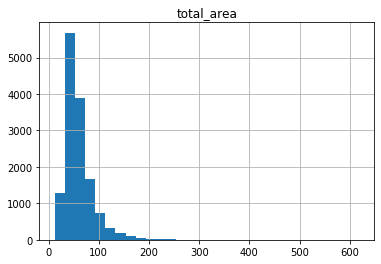

In [34]:
flat.hist('total_area', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7eca01cdd0>]],
      dtype=object)

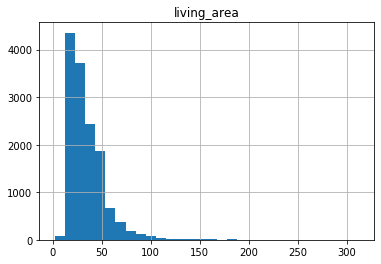

In [35]:
flat.hist('living_area', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ec9ec4f50>]],
      dtype=object)

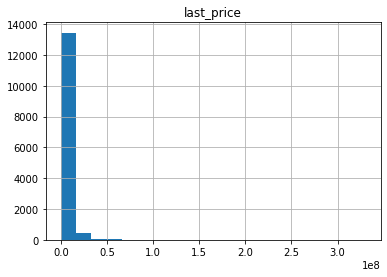

In [36]:
flat.hist('last_price', bins = 20)

count    1.403000e+04
mean     1.010928e+05
std      4.860122e+04
min      1.110000e+02
25%      7.857100e+04
50%      9.687500e+04
75%      1.165030e+05
max      1.736842e+06
Name: metre_price, dtype: float64

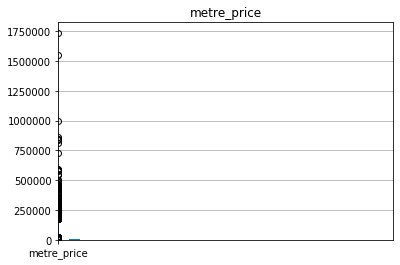

In [37]:
flat.hist('metre_price', bins = 30)
flat.boxplot('metre_price')
flat['metre_price'].describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ec9d582d0>]],
      dtype=object)

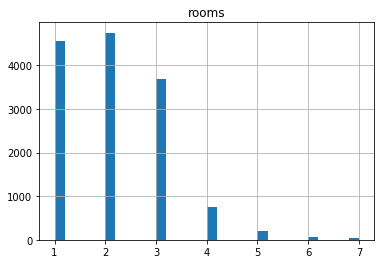

In [38]:
flat.hist('rooms', bins = 30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ec9c2b2d0>]],
      dtype=object)

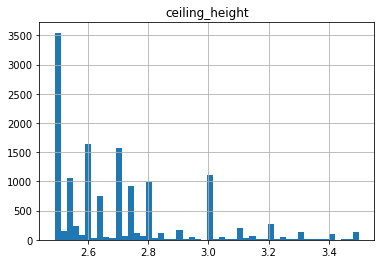

In [39]:
flat.hist('ceiling_height', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ec9ba9450>]],
      dtype=object)

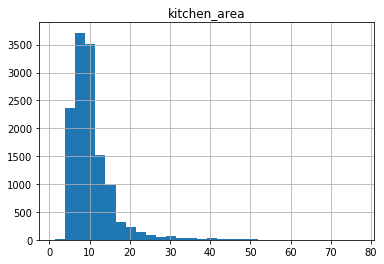

In [40]:
flat.hist('kitchen_area', bins = 30)

Как видно из гистограмм, фактически все из них похожи на распределение Пуассона, кроме, конечно,потолков, что странно, но вполне логчно, так как для каждого человека удобна будет квартира со своими размерами для каждой цены и материального положения каждого индивида.

Изучим длительность продажи квартир и построим гистограмму для длительностей продаж квартир. Также, посмотрим на график межквартильного размаха, там же найдем медиану и среднее значение.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ec9b64cd0>]],
      dtype=object)

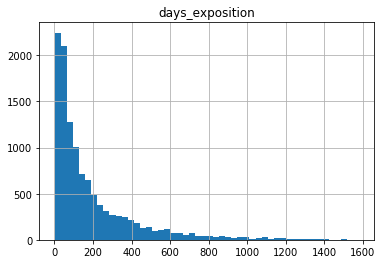

In [41]:
flat.hist('days_exposition', bins = 50)

count    11669.000000
mean       189.138144
std        227.509775
min          1.000000
25%         45.000000
50%        103.000000
75%        245.000000
max       1580.000000
Name: days_exposition, dtype: float64

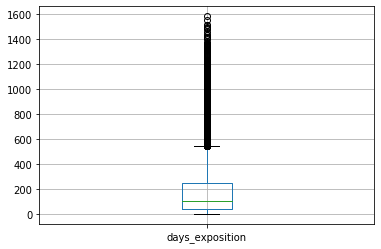

In [42]:
flat.boxplot('days_exposition')
flat['days_exposition'].describe()

Видим, что медиана и среднее значение очень рознятся, что плохо... Видим, что после 600 дней попыток продажи квартиры, количество квартир стремится к нулю. Воспользуемся методом query среза данных и построим ящик с усами и его характеристику для нового среза данных. Назначим максимальным значением длительности продаж третий квартиль, а минимумом - первый квартиль.

In [43]:
flat_good_time = flat.query('42 <= days_exposition <= 450')

In [44]:
flat_good_time['days_exposition'].describe()

count    7674.000000
mean      159.359656
std       107.637580
min        42.000000
25%        70.000000
50%       124.000000
75%       219.750000
max       450.000000
Name: days_exposition, dtype: float64

Медиана и среднее арифметическое примерно похожи, это хороший знак.

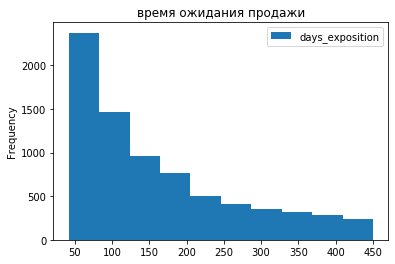

In [45]:
flat_good_time.plot( title= 'время ожидания продажи', kind = 'hist', y = 'days_exposition')


Теперь среднее арифметическое примерно равно медиане, это говорит о том, что мы все сделали правильно. По итогам можем сказать, что долгие продажи являются продажами более 245 дней, а короткие продажи - меньше 42 дней. Особенность графика в том, что оне не похож на пуассоновское распределение, но это нормально, так как 600 дней висеть на сайте это долговато. График этой функции напоминает f(x)= a^x, a < 1. Итак, найдем корелляцию между нашими величинами, а с комнатами разберемся отдельно.

,kitchen_area,last_price,rooms,total_area
kitchen_area,1.000000,0.915888,0.826592,0.954875
last_price,0.915888,1.000000,0.858470,0.966908
rooms,0.826592,0.858470,1.000000,0.913661
total_area,0.954875,0.966908,0.913661,1.000000


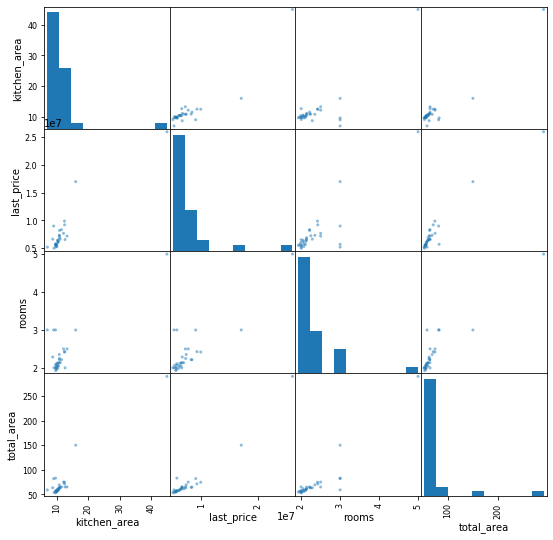

In [46]:
tab1 = flat.pivot_table(index = 'total_images', values = ['rooms','last_price', 'total_area', 'kitchen_area'])
tab2 = flat.pivot_table(index = 'total_images', values = ['floor', 'living_area', 'cityCenters_nearest', 'day', 'month', 'day_of_week', 'ceiling_height', 'floors_total'])
pd.plotting.scatter_matrix(tab1, figsize = (9,9))
tab1.corr()


,ceiling_height,cityCenters_nearest,day,day_of_week,floor,floors_total,living_area,month
ceiling_height,1.000000,-0.648221,0.418107,0.068222,0.072800,-0.052490,0.425625,0.167565
cityCenters_nearest,-0.648221,1.000000,-0.759084,0.011942,-0.391372,-0.099362,-0.454211,-0.456570
day,0.418107,-0.759084,1.000000,-0.440685,0.146256,0.074264,0.221039,0.518441
day_of_week,0.068222,0.011942,-0.440685,1.000000,0.122437,-0.034498,-0.103056,-0.157178
floor,0.072800,-0.391372,0.146256,0.122437,1.000000,0.827299,0.513335,0.599664
floors_total,-0.052490,-0.099362,0.074264,-0.034498,0.827299,1.000000,0.103918,0.535716
living_area,0.425625,-0.454211,0.221039,-0.103056,0.513335,0.103918,1.000000,0.420012
month,0.167565,-0.456570,0.518441,-0.157178,0.599664,0.535716,0.420012,1.000000


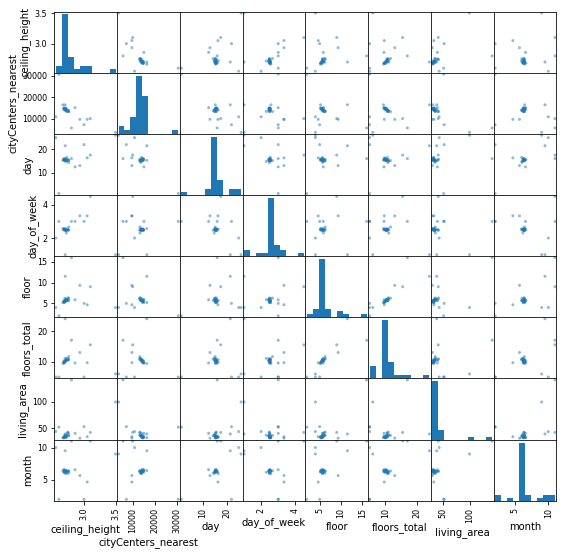

In [47]:
pd.plotting.scatter_matrix(tab2, figsize = (9,9))
tab2.corr()

Видим,что самая значимая зависимость цены от площади чего либо. Также цена зависит от количества комнат и не очень то и зависит от расстояния до центра, это связано с тем, что стоимость квартиры зависит еще и от других параметров и квартира на окраине может быть по цене как квартира в центре.

Найдем топ 10 населенных пунктов с наибольшм количеством объявлений.

In [48]:
top_mest = flat['locality_name'].value_counts().sort_values(ascending = False)
top_mest.head(10)

Санкт-Петербург      9732
Всеволожск            265
Пушкин                226
посёлок Шушары        215
Колпино               202
посёлок Мурино        196
Гатчина               147
Петергоф              145
посёлок Парголово     136
Сестрорецк            128
Name: locality_name, dtype: int64

Создадим сводную таблицу по среднему, минимаьному, максимальному и по количеству цен.

In [49]:
df = flat.pivot_table(index = 'locality_name', values = ['metre_price'], aggfunc  =['mean', 'min', 'max', 'count'])
df.columns = ['mean', 'min', 'max', 'count']
df.sort_values('count', ascending = False).head(10)


,mean,min,max,count
locality_name,,,,
Санкт-Петербург,115025.071003,111,1736842,9732
Всеволожск,67482.603774,31400,137333,265
Пушкин,103668.212389,59836,256521,226
посёлок Шушары,79848.051163,47766,134000,215
Колпино,76305.658416,53333,125000,202
посёлок Мурино,87964.586735,53424,140312,196
Гатчина,70514.557823,18103,146315,147
Петергоф,86081.627586,57692,228392,145
посёлок Парголово,91519.897059,49107,141891,136


Найдем самые большие и самые маленькие цены на жилье в топе мест по количеству объявлений.

In [50]:
good_df = flat.pivot_table(index = 'locality_name', values = 'last_price',aggfunc = ['mean', 'min', 'max', 'count'])
good_df.columns = ['mean', 'min', 'max', 'count']
good_df = good_df.sort_values('count', ascending = False).head(10)
print('Самая большая средняя цена в: \n')
print(good_df.loc[(good_df['mean'] == good_df['mean'].max()), 'mean'], '\n')
print('Самая низкая средняя цена в: \n')
print(good_df.loc[(good_df['mean'] == good_df['mean'].min()), 'mean'])
print('\n')
print('Самая большая цена на жилплощадь зафиксирована в \n', good_df.loc[(good_df['max'] == good_df['max'].max()), 'max'])
print('\n')
print('Самая низкая цена на жилплощадь зафиксирована в \n', good_df.loc[(good_df['min'] == good_df['min'].min()), 'min'])

Самая большая средняя цена в: 

locality_name
Санкт-Петербург    7.776299e+06
Name: mean, dtype: float64 

Самая низкая средняя цена в: 

locality_name
Гатчина    3.615068e+06
Name: mean, dtype: float64


Самая большая цена на жилплощадь зафиксирована в 
 locality_name
Санкт-Петербург    330000000
Name: max, dtype: int64


Самая низкая цена на жилплощадь зафиксирована в 
 locality_name
Санкт-Петербург    12190
Name: min, dtype: int64


In [51]:
flat1 = flat
flat1.dropna(subset = ['cityCenters_nearest'], inplace = True)
flat1['km_centre'] = flat['cityCenters_nearest'] / 1000
flat1['km_centre'] = flat1['km_centre'].astype('int64')
flat['km_price'] = flat.groupby('km_centre')['last_price'].transform('mean')
dist_price = flat1.pivot_table(index = 'km_centre', values = 'last_price')
dist_price

,last_price
km_centre,
0,1.872518e+07
1,1.932018e+07
2,1.370598e+07
3,1.154196e+07
4,1.272070e+07
5,1.408110e+07
6,1.462632e+07
7,1.098197e+07
8,9.038677e+06


Построим график зависимости цены за км от расстояния от центра.

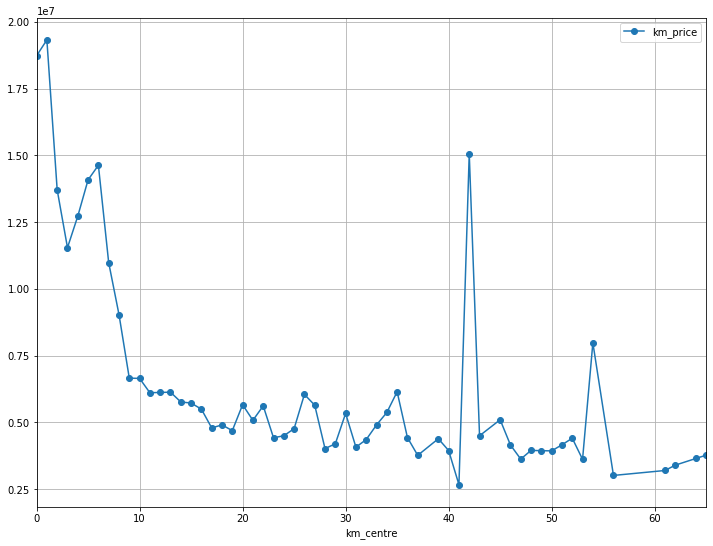

In [52]:
#dist_price.plot(style = 'o-', grid = True, figsize = (12, 9))
sr_cen = flat1.pivot_table(index = 'km_centre', values = 'km_price')
sr_cen.plot(style = 'o-', grid = True, figsize = (12,9))

Видим, что цена начинает падать по мере отдалености от центра, но имеются скачки. Скорее всего, эти скачки- места туристического пика или какие то частные секторы с хорошими большими домами. Центр находится в самом начале графика, там расстояние до центра близко к нулю, а значит дом находится уже в центре. Выделим срез квартир, находящихся в центре, если судить по цене, то центр = +- 8 км от него. Сделаем срез методом query

In [53]:
flat2 = flat1.query('km_centre <= 8')

In [54]:
flat2['ceiling_height'].describe()

count    2598.000000
mean        2.969723
std         0.269501
min         2.490000
25%         2.750000
50%         3.000000
75%         3.180000
max         3.500000
Name: ceiling_height, dtype: float64

Среднее и медиана высот потолков прмерно равны, это замечательно. В среднем, потолки в центре Петербурга равны 
трем метрам. Посмотрим на их площадь, цену, число комнат.

In [55]:
flat2['last_price'].describe()

count    2.598000e+03
mean     1.275603e+07
std      1.720463e+07
min      1.600000e+06
25%      6.253500e+06
50%      8.642500e+06
75%      1.300000e+07
max      3.300000e+08
Name: last_price, dtype: float64

In [56]:
flat['rooms'].describe()

count    11163.000000
mean         2.165726
std          1.047578
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [57]:
flat['total_area'].describe()

count    11163.000000
mean        62.532025
std         34.195221
min         12.000000
25%         42.000000
50%         54.000000
75%         73.000000
max        618.000000
Name: total_area, dtype: float64

In [58]:
flat['living_area'].describe()

count    11163.000000
mean        36.024524
std         21.008264
min          2.000000
25%         19.900000
50%         31.600000
75%         44.100000
max        312.500000
Name: living_area, dtype: float64

Найдем зависимость квартир в центре от параметров таблицы.

In [59]:
flat2.pivot_table(index = 'total_images', values = ['rooms','last_price', 'total_area', 'kitchen_area', 'floor', 'living_area', 'cityCenters_nearest', 'day', 'month', 'day_of_week', 'ceiling_height', 'floors_total']).corr()

,ceiling_height,cityCenters_nearest,day,day_of_week,floor,floors_total,kitchen_area,last_price,living_area,month,rooms,total_area
ceiling_height,1.000000,-0.536324,0.414986,-0.651641,-0.371502,-0.493984,-0.303895,-0.307107,-0.122154,-0.258477,-0.484472,-0.209797
cityCenters_nearest,-0.536324,1.000000,-0.456684,0.737526,0.074978,0.154448,-0.060195,-0.037084,-0.133415,-0.182160,0.021904,-0.080618
day,0.414986,-0.456684,1.000000,-0.455084,0.078705,-0.103297,0.065057,0.027361,0.232238,0.080343,0.147959,0.144634
day_of_week,-0.651641,0.737526,-0.455084,1.000000,0.181516,0.191597,0.097053,0.043823,0.012652,0.343620,0.278013,0.071067
floor,-0.371502,0.074978,0.078705,0.181516,1.000000,0.905186,0.947714,0.648518,0.834905,0.505743,0.851795,0.916931
floors_total,-0.493984,0.154448,-0.103297,0.191597,0.905186,1.000000,0.878574,0.663090,0.717001,0.506473,0.765275,0.808844
kitchen_area,-0.303895,-0.060195,0.065057,0.097053,0.947714,0.878574,1.000000,0.767228,0.879977,0.570081,0.837012,0.948020
last_price,-0.307107,-0.037084,0.027361,0.043823,0.648518,0.663090,0.767228,1.000000,0.755827,0.425840,0.745448,0.760999
living_area,-0.122154,-0.133415,0.232238,0.012652,0.834905,0.717001,0.879977,0.755827,1.000000,0.584678,0.872841,0.980518
month,-0.258477,-0.182160,0.080343,0.343620,0.505743,0.506473,0.570081,0.425840,0.584678,1.000000,0.638289,0.585002


Видим, что наибольшая зависимость наблюдается между площадью(всех вариаций: жилая площадь, полная площадь, плозадь кухни) и ценой и количеством комнат и ценой, также наблюдается бОльшая зависимость между ценой и этажом, на котором расположена квартира, а также цена стала больше зависеть от количества этажей в доме,это и есть отличие от обычных квартир.

### Шаг 5. Общий вывод

Итак, исходя из результатов проекта, можно сказать, что недвижимость вдали от центра ценится преимущественно за площадь, а ценность квартиры в центре зависит еще и от этажа квартиры и от многоэтажности дома, возможно, это связано с возрастом дома, раньше дома были не очень высокие, отсюда и связь с количеством этажей. Также, что логично, цена квартиры очень зависит от площади всех параметеров.ИТАК, В ХОДЕ ПОДГОТОВКИ ПРОЕКТА МЫ ИЗУЧИЛИ ИНФОРМАЦИЮ О ДАТАФРЕЙМЕ ПО СРЕДСТВАМ АВТОМАТИЧЕСКОГО ПОСТРОЕНИЯ ГРАФИКОВ С ПОМОЩЬЮ ЦИКЛА, ОТБРОСИЛИ УСЫ С ПОМОЩЬЮ ДИАГРАММЫ МЕЖКВАРТИЛЬНОГО РАЗМАХА. ТАКЖЕ МЫ НАШЛИ КОРРЕЛЯЦИЮ ВЕЛИЧИН И ПОСТРОИЛИ МАТРИЦУ РАСПРЕДЕЛЕНИЯ И С ПОМОЩЬЮ ГРАФИКОВ СМОГЛИ ПОНЯТЬ ЗАВИСИМОСТЬ ЦЕНЫ ОТ ПАРАМТЕРОВ КВАРТИРЫ.